<a href="https://colab.research.google.com/github/Gleycykelly/lia1-2023-1/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr style="height:10px">

<div class='container2'>
	<div style='padding: 0 7em 2em 12em;'>
	<h1>Laboratório de Inovação e Automação 1 (LIA 1)</h1>
	<div style="font-size:12pt;float:left;"> 2023/1 | 46M34 | Sala 200 CAE</div><br><br>
    <div style="font-size:12pt;float:left;"><b>Projetos de Inteligência Artificial</b></div>
	</div>
</div>


 <hr style="height:5px">

    
<h2>Aula 14 - Aula 3 no FastAI</h2>

Notebook desenvolvido por: Gleycykelly Syssy Indymayer Carnot Amaro

 <hr style="height:2px">


## Gradio Pets

In [1]:
!pip install -q timm

In [2]:
from fastai.vision.all import *

import timm

In [3]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=RegexLabeller(pat = r'^([^/]+)_\d+'),
    item_tfms=Resize(224))

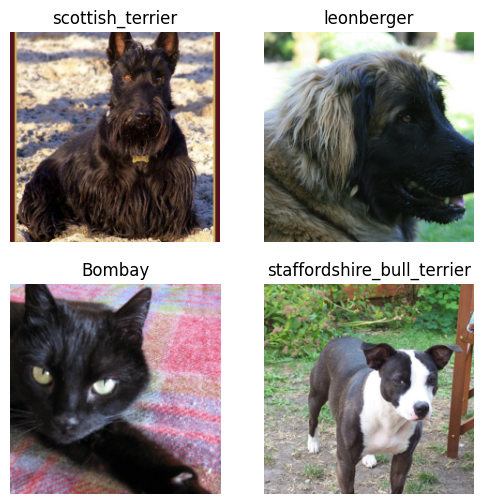

In [4]:
dls.show_batch(max_n=4)

In [5]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.476981,0.287364,0.093369,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.469843,0.292690,0.093369,01:04
1,0.275267,0.216529,0.065629,01:05
2,0.142691,0.188679,0.060217,01:04


In [6]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

In [7]:
learn = vision_learner(dls, 'convnext_tiny.fb_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.120603,0.233114,0.075778,01:01


epoch,train_loss,valid_loss,error_rate,time
0,0.267915,0.208039,0.070365,01:03
1,0.202572,0.160634,0.050744,01:06
2,0.127599,0.143811,0.050068,01:04


In [8]:
learn.export('model.pkl')